# Lab 3: Linear Regression and the Gauss-Markov theorem
Welcome to DS102 lab!

The goals of this lab are to get some practice with applying linear regression, and to observe what happens when the Gauss-Markov theorem is applicable in practice.

The code you need to write is commented out with a message "TODO: fill in". There is additional documentation for each part as you go along.

##  Course Policies
### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually.** If you do discuss the assignments with others please include their names in the cell below.

**Submission:** to submit this assignment, rerun the notebook from scratch (by selecting Kernel > Restart & Run all), and then print as a pdf (File > download as > pdf) and submit it to Gradescope.

**This assignment should be completed and submitted before Thursday February 13, 2020 at 11:59 PM.**

# Collaborators
Write the names of your collaborators in this cell.

# Setup
Let's begin by importing the libraries we will use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# Part 1: Ordinary Least Squares estimator
In the first part of this lab, we will apply the ordinary least squares (OLS) estimator in the context of linear regression. The objective is to use linear regression to understand how the number of people waiting in line at a boba tea shop and the number of employees working at the shop correlates with the amount of time you have to spend at the boba tea shop before getting your tea. 

## Ground truth model
Let $y$ be the amount of time it takes to get your boba (in minutes), let $x = [x_0, x_1]$ be a feature vector where $x_0$ is the number of people waiting in line to get boba, and $x_1$ is the number of employees behind the counter. For this lab, we provide the ground truth that $y = \langle \beta, x \rangle$ for some true $\beta = [\beta_0, \beta_1]$. Specifically, we set the true $\beta$ values to be $\beta_0 = 5$, and $\beta_1 = -2$. In words, this means that for each additional person waiting in line, you'll have to wait $5$ more minutes, but for each employee behind the counter, you'll have to wait $2$ fewer minutes.


## 1a) Simulate dataset
Here we simulate the dataset described above. We draw $n$ samples where $x_0^{(1)},...,x_0^{(n)}$ are drawn from a uniform distribution between 0 and 30 people, and $x_1^{(1)},...,x_1^{(n)}$ are drawn from a uniform distribution between 0 and 5 people.

Let $X$ be an $n \times 2$ matrix where the $i$th row of $X$ is a data point $x^{(i)} = [x_0^{(i)}, x_1^{(i)}]$. Let $\mathbf{y}$ be am $n \times 1$ matrix where the $i$th row is $y^{(i)} = \langle \beta, x^{(i)}\rangle$.

In this section, you will first calculate the ground truth $\mathbf{y}$ from some randomly sampled $X$. Specifically, you will implement $\mathbf{y} = X\beta$, where $X\beta$ is matrix multiplication between $X$ and $\beta$.

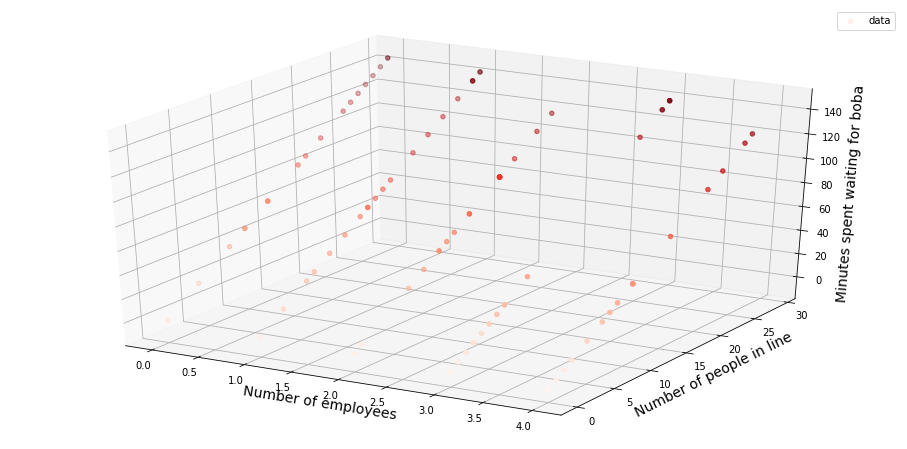

In [2]:
# TODO: simulate the data by calculating the ground truth y matrix.
TRUE_BETA=np.array([5.0, -2.0])

def simulate_data_no_error(n):
    # Sample Xs.
    x0 = np.random.choice(30, n)
    x1 = np.random.choice(5, n)
    X = np.array([x0, x1]).T
    # TODO: Calculate ground truth ys. Hint: use np.matmul to do matrix multiplication.
    y = np.matmul(X, TRUE_BETA)
    return X, y

X, y = simulate_data_no_error(100)

def plot_data(input_X, input_y, predictions = None):
    plt.figure(figsize=(16, 8))
    ax = plt.axes(projection='3d')
    if predictions is not None:
        ax.plot_trisurf(input_X.T[1], input_X.T[0], predictions, cmap='viridis', edgecolor='none')
    ax.scatter3D(input_X.T[1], input_X.T[0], input_y, c=input_y, cmap='Reds', label="data");
    ax.set_xlabel("Number of employees", fontsize=14)
    ax.set_ylabel("Number of people in line", fontsize=14)
    ax.set_zlabel("Minutes spent waiting for boba", fontsize=14)
    plt.legend()
    plt.show()
    
plot_data(X,y)

## 1b) Calculate the Ordinary Least Squares (OLS) estimator
First we are interested in finding the best approximation $y^{(i)} \approx \langle x^{(i)},  \hat{\beta} \rangle$, where $\hat{\beta}_0 = [\hat{\beta}_0,\hat{\beta}_1] $, and $\hat{\beta}_0$ is our estimate of how many additional minutes each person in line adds to our wait time, and $\hat{\beta}_1$ is our estimate of how many minutes each employee takes away from our wait time. We want to find the constant $\hat{\beta}$ that minimizes $\sum_{i=1}^n (y^{(i)} - \langle x^{(i)}, \hat{\beta}\rangle )^2$. This estimator $\hat{\beta}$ is known as the **Ordinary Least Squares (OLS)** estimator.

Specificaly, given a dataset of $n$ samples with $d$ features, let $X$ be an $n \times d$ matrix where each row is a feature vector $x^{(i)}$, and let $\mathbf{y}$ be an $n$ dimensional vector where each entry is a label $y^{(i)}$. Recall from class that the OLS estimator that minimizes $\sum_{i=1}^n (y^{(i)} - \langle x^{(i)}, \hat{\beta}\rangle)^2$ is:
$$\hat{\beta} = (X^T X)^{-1} X^T y$$

In [3]:
def calculate_beta_hat(X, y):
    """Calculates the OLS estimator beta_hat.
    
    Args:
      X: numpy array with n rows and 2 columns, where each row corresponds with a feature vector [x0, x1].
      y: numpy array with n entries, where each entry corresponds with a label value for a given sample.
    
    Returns:
      beta_hat: numpy array with 2 entries, where the entries are [beta_hat_0, beta_hat_1].
    """
    # TODO: calculate beta_hat as the OLS estimator. 
    # Hint: use np.linalg.inv to take a matrix inverse. Use np.dot to take a dot product,
    # or np.matmul for matrix multiplication.
    beta_hat = np.dot(np.linalg.inv(X.T @ X), (X.T @ y)) 
    return beta_hat

beta_hat = calculate_beta_hat(X, y)
print("The OLS estimator beta_hat is:", (beta_hat))

# Test that the estimator beta_hat basically equals TRUE_BETA
assert(beta_hat.astype(int).all() == TRUE_BETA.astype(int).all())
print("Test passed! :) ")

The OLS estimator beta_hat is: [ 5. -2.]
Test passed! :) 


### Compute OLS predictions
Given this $\hat{\beta}$, we compute the predictions for the points $x^{(i)}$ we have in the data set. For each data point $x^{(i)}$, the prediction we compute is $\hat{\beta} x^{(i)}$. This means that if $X$ is a matrix where the $i$th row is $x^{(i)}$, then the vector of all $n$ predictions should be $X \hat{\beta}$ (this is a matrix multiplication between $X$ and $\hat{\beta}$).

In this part, we will compute these predictions, and then plot the predictions to see how well they fit the data.

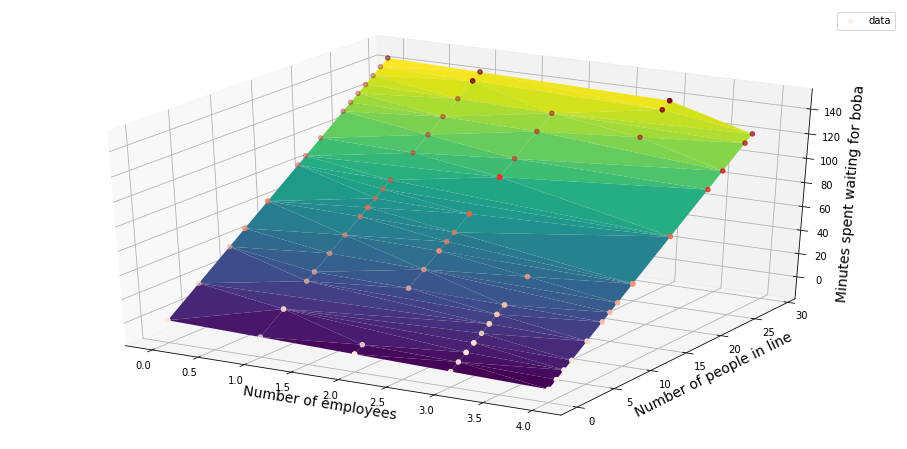

In [4]:
# TODO: calculate the predictions from the beta_hat estimated above. Hint: use np.matmul again.
def compute_OLS_predictions(X, beta_hat):
    """Computes OLS predictions given data X and OLS estimator beta_hat.
    
    Args: 
      X: numpy array with n rows and 2 columns, where each row represents a feature vector [x0, x1].
      beta_hat: numpy array with 2 entries representing the OLS estimator.
      
    Returns:
      y: numpy array with n rows and 1 column, where each row represents an output <x^{(i)}, beta_hat>.
    """
    predictions = np.matmul(X, beta_hat) # TODO: calculate the predictions from the beta_hat estimated above. Hint: use np.matmul again.
    return predictions

predictions = compute_OLS_predictions(X, beta_hat)
plot_data(X, y, predictions=predictions)

# Part 2: OLS estimation with errors in the label $y$
In this part, we will observe what happens to the OLS estimator when there are errors in the label $y$.

## 2a) Simulate dataset
We will simulate a dataset with error in the labels by letting the observed $y^{(i)} = \langle x^{(i)}, \beta \rangle + \epsilon^{(i)}$, where $\epsilon^{(i)}$ is random error drawn from a normal distribution with mean $0$ and variance $10$. This error simulates the idea that maybe the number of minutes that you end up waiting for boba varies from day to day by approximately plus or minus $10$ minutes.

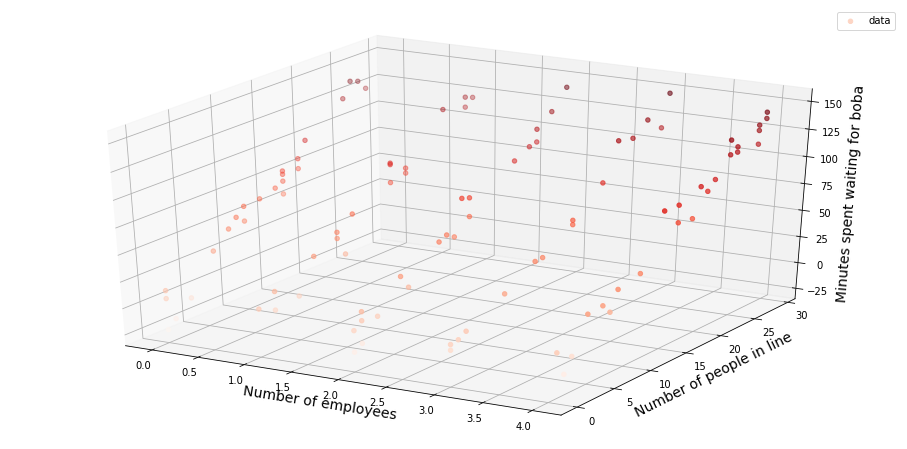

In [9]:
# TODO: simulate a dataset with errors in the label y.
def simulate_data_label_error(n):
    # Sample Xs.
    x0 = np.random.choice(30, n)
    x1 = np.random.choice(5, n)
    X = np.array([x0, x1]).T
    # Sample epsilon errors. epsilons is an n x 1 matrix where each entry is a given epsilon^{(i)}.
    epsilons = np.random.normal(0,10,n)
    # Calculate ys with error.
    # TODO: add epsilon errors to the label y. Hint: use np.add.
    y = np.add(np.matmul(X, TRUE_BETA), epsilons)
    return X, y

X_label_error, y_label_error = simulate_data_label_error(100)

plot_data(X_label_error, y_label_error)

## 2b) Calculate the Ordinary Least Squares (OLS) estimator
We will calculate the OLS estimator from this new simulated dataset that includes the $\epsilon^{(i)}$ errors.

In [10]:
# No TODOs here, just run this cell.
# We are reusing the function you wrote earlier to calculate beta_hat on this new dataset.
beta_hat = calculate_beta_hat(X_label_error, y_label_error)
print("The OLS estimator beta_hat is:", (beta_hat))

The OLS estimator beta_hat is: [ 5.02258374 -1.711061  ]


### Compute OLS predictions
Given this $\hat{\beta}$, we compute the predictions for the points $x^{(i)}$ we have in the data set. 
Here, we will compute these predictions, and then plot the predictions to see how well they fit the data with error in the labels.

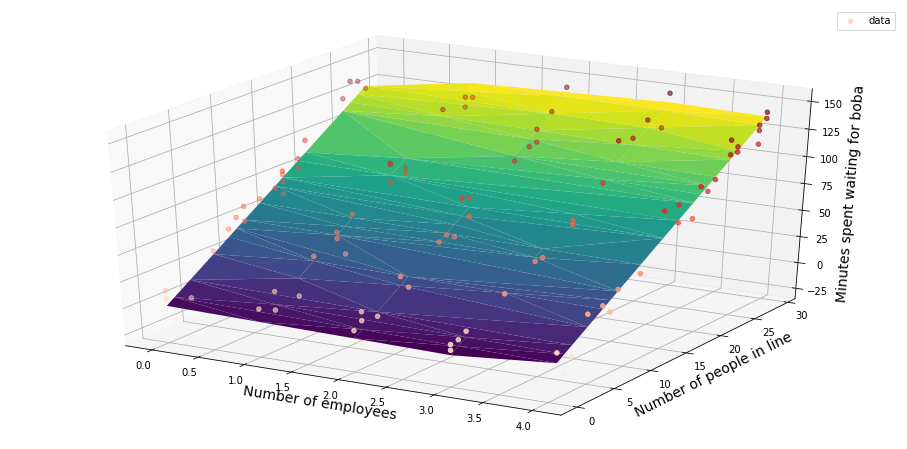

In [11]:
# No TODOs here, just run this cell. 
# We are reusing the function you wrote earlier to compute OLS predictions on this new dataset.
predictions = compute_OLS_predictions(X_label_error, beta_hat)
plot_data(X_label_error, y_label_error, predictions=predictions)

## 2c) Observe how the OLS estimator $\hat{\beta}$ varies when the $\epsilon$ errors are included.
Since the simulated dataset now has some random errors, we will observe that the OLS estimator $\hat{\beta}$ will not always be the same every time you generate new data. In this part, we will generate new data 5 times, and observe what the OLS estimator looks like for each of those 5 different draws.

In [12]:
# No TODOs here, just run this cell and observe how the OLS estimator beta_hat varies for each 
# different random draw of data.
num_random_draws = 5
num_samples = 100
for i in range(num_random_draws):
    X_label_error, y_label_error = simulate_data_label_error(num_samples)
    beta_hat = calculate_beta_hat(X_label_error, y_label_error)
    print("The OLS estimator beta_hat for random draw %d is:" % i, (beta_hat))

The OLS estimator beta_hat for random draw 0 is: [ 4.98142131 -2.52313015]
The OLS estimator beta_hat for random draw 1 is: [ 5.10585603 -1.84128634]
The OLS estimator beta_hat for random draw 2 is: [ 4.9873987  -1.89598553]
The OLS estimator beta_hat for random draw 3 is: [ 4.99103473 -1.9431461 ]
The OLS estimator beta_hat for random draw 4 is: [ 4.98206886 -1.79336029]


### Question: For the five random draws above, does the OLS estimator $\hat{\beta}$ generally look like it's close to the true $\beta$?

TODO: fill in your answer.

Answer: Yes, in general $\hat{\beta}$ should approximately be close to the true $\beta$ over those five random draws.

# Part 3: OLS estimation with errors in the features $x$
In this part, we will observe what happens to the OLS estimator when there are errors in the observed feature vector $x$. Specifically, we will see what happens when we observe noise in the first feature $x_0$, and not the second feature.

## 3a) Simulate dataset
We will simulate a dataset with error in the first feature $x_0$. Let $y^{(i)} = \langle x^{(i)}, \beta \rangle$ as before, but now suppose instead of observing $x^{(i)}$, we observe $\tilde{x}^{(i)}$ where $\tilde{x}^{(i)} = [x^{(i)}_0 + \epsilon^{(i)}, x^{(i)}_1]$. Here, $\epsilon^{(i)}$ is a random error drawn from a normal distribution with mean $0$ and standard deviation $3$. This error simulates the idea that maybe you weren't super precise about counting exactly how many people were in line, and might have been off by plus or minus 3 people.

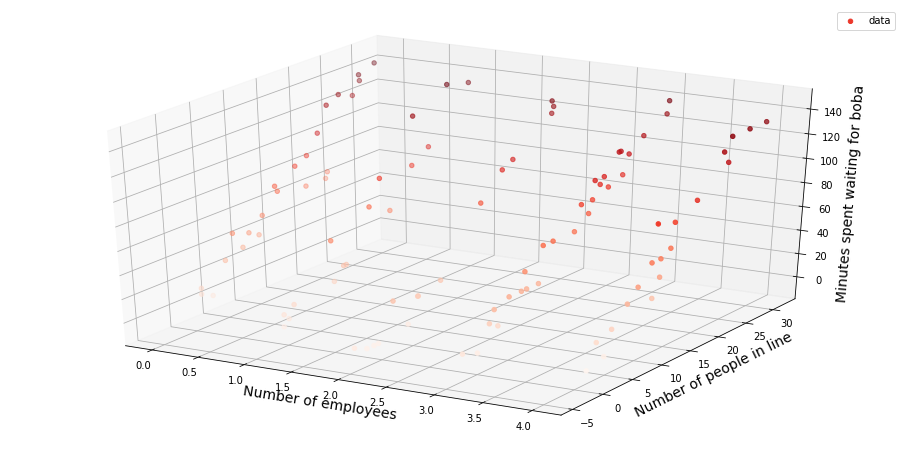

In [13]:
# TODO: simulate a dataset with errors in the first feature x0.
def simulate_data_feature_error(n):
    # Sample Xs as before.
    x0 = np.random.choice(30, n)
    x1 = np.random.choice(5, n)
    X = np.array([x0, x1]).T
    # Generate ys as before in part 1a).
    y = np.matmul(X, TRUE_BETA)
    # Sample epsilon errors. epsilons is an n dimensional vector where each entry is a given epsilon^{(i)}.
    epsilons = np.random.normal(0,3,n)
    # TODO: add epsilon errors to the feature x0. Hint: use np.add.
    x0_tilde = np.add(x0, epsilons)
    X_tilde = np.array([x0_tilde, x1]).T
    return X_tilde, y

X_feature_error, y_feature_error = simulate_data_feature_error(100)

plot_data(X_feature_error, y_feature_error)

## 3b) Calculate the Ordinary Least Squares (OLS) estimator
We will calculate the OLS estimator from this new simulated dataset that includes the $\epsilon^{(i)}$ errors.

In [14]:
# No TODOs here, just run this cell.
# We are reusing the function you wrote earlier to calculate beta_hat on this new dataset.
beta_hat = calculate_beta_hat(X_feature_error, y_feature_error)
print("The OLS estimator beta_hat is:", (beta_hat))

The OLS estimator beta_hat is: [ 4.74757795 -1.02637435]


### Compute OLS predictions
Given this $\hat{\beta}$, we compute the predictions for the points $\tilde{x}^{(i)}$ we observe in the data set. 
Here, we will compute these predictions, and then plot the predictions to see how well they fit the data with error in the labels.

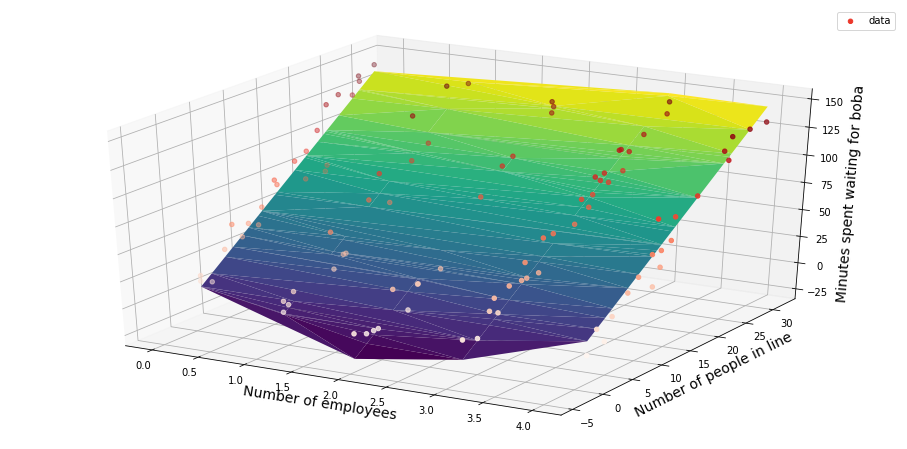

In [15]:
# No TODOs here, just run this cell. 
# We are reusing the function you wrote earlier to compute OLS predictions on this new dataset.
predictions = compute_OLS_predictions(X_feature_error, beta_hat)
plot_data(X_feature_error, y_feature_error, predictions=predictions)

## 3c) Observe how the OLS estimator $\hat{\beta}$ varies when the $\epsilon$ errors are included.
Since the simulated dataset now has some random errors, we will observe that the OLS estimator $\hat{\beta}$ will not always be the same every time you generate new data. In this part, we will generate new data 5 times, and observe what the OLS estimator looks like for each of those 5 different draws.

In [16]:
# No TODOs here, just run this cell and observe how the OLS estimator beta_hat varies for each 
# different random draw of data.
num_random_draws = 5
num_samples = 100
for i in range(num_random_draws):
    X_feature_error, y_feature_error = simulate_data_feature_error(num_samples)
    beta_hat = calculate_beta_hat(X_feature_error, y_feature_error)
    print("The OLS estimator beta_hat for random draw %d is:" % i, (beta_hat))

The OLS estimator beta_hat for random draw 0 is: [ 4.82791643 -0.95775971]
The OLS estimator beta_hat for random draw 1 is: [ 4.83152595 -1.43044253]
The OLS estimator beta_hat for random draw 2 is: [ 4.66542498 -0.51004555]
The OLS estimator beta_hat for random draw 3 is: [ 4.67355528 -0.67258671]
The OLS estimator beta_hat for random draw 4 is: [ 4.677626   -0.24256008]


### Question: How do the five random OLS estimators $\hat{\beta}$ in part 3c) compare to the five random OLS estimators $\hat{\beta}$ in part 2c)? Does one set of five tend to more closely revolve around the true $\beta$ on average than the other?

TODO: fill in your answer.

Answer: The estimators beta_hat from part 2c) should more closely revolve around the true $\beta$ than the estimators from part 3c). In part 3c, we observe that $\hat{\beta}_0$ and $\hat{\beta}_1$ both tend to shrink towards 0.

## How this all relates to Gauss-Markov:
In lecture, we showed that when we only observe error in the labels (i.e. $y = \langle x, \beta \rangle + \epsilon$), and $\epsilon$ has zero-mean, the Gauss-Markov theorem applies, and the error shouldn't mess up our OLS regression estimate. On the other hand, noise in the covariates (aka the features) *can* mess up our OLS regression estimates. Specifically, noise in our covarites causes us to do implicit regularization via ridge regression, which formalizes the intuition that adding noise will lead to shrinking the coefficients towards zero. 